# Averaging Closure Phases Coherently along LST Axis
The aim of this notebook is to investigate what duration of data can be averaged without degrading the EoR signal. 

In [1]:
import os
import sys
import numpy as np
from scipy.signal.windows import get_window
import astropy.units as u

import matplotlib.pyplot as plt
from matplotlib import cm 
from ipywidgets import interact

root = os.path.join(os.getcwd(), "../")
sys.path.append(root)

import vis as vs
import dspec

## Compute Power Spectra

### Make Window Function
Using a convolved (modified) Blackmanharris window for improved dynamic range.

In [2]:
bh = get_window("blackmanharris", len(freq_array))
bh = bh / np.sqrt(np.mean(bh**2))
bh2 = np.convolve(bh, bh)[::2]
bh2 = bh2 / np.sqrt(np.mean(bh2**2))

NameError: name 'freq_array' is not defined

### Compute Power Spectra

In [ ]:
import h5py
with h5py.File("/home/pascal/PhD Project/Code/ClosureSim/data/ps_lst_avg_EQ14_FCB2.h5", "r") as f:
   pslist = f["Data"][()]
   delay = f["Delay"][()]
   lst_list = f["LST Array"][()]

lst_flags = [4.0, 4.2]
idx = np.where(lst_list > lst_flags[1])
pslist = pslist[idx]
lst_list = lst_list[idx]
ps_list = np.nanmean(pslist, axis=0)

## Plots

In [ ]:
def plot(i):
    N = len(ps_list)
    colors = cm.get_cmap("plasma")(np.linspace(0, 1, 10))

    for ps, color in zip(pslist[i], colors):
        plt.plot(delay, ps.real, color=color, linewidth=0.5)

    plt.yscale("log")
    plt.xlim([min(delay), max(delay)])
    plt.ylim([1e-2, 1e14])
    plt.xlabel(r"Delay ($\mu\mathrm{s}$)")
    plt.ylabel(r"$\frac{2}{3}P_\bigtriangledown\left(\kappa_{||}\right)$ (pseudo $\mathrm{mK}^2\mathrm{h}^{-3}\mathrm{Mpc}^3$)");
    plt.show()

interact(plot, i=(0, len(pslist)-1))


interactive(children=(IntSlider(value=455, description='i', max=910), Output()), _dom_classes=('widget-interac…

<function __main__.plot(i)>

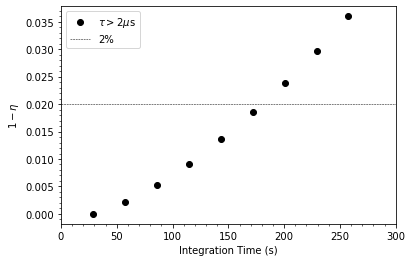

In [ ]:
idx = np.where(np.abs(delay) > 2)[0]
N=9
loss_0 = [np.mean(ps_list[i].real[idx] / ps_list[0][idx].real) for i in range(N)]
loss_1 = [np.median(ps_list[i].real[idx] / ps_list[0][idx].real) for i in range(N)]
loss_rel = [1,] + [np.mean(ps_list[i].real[idx] / ps_list[i-1][idx].real) for i in range(1, N)]
xvals = np.arange(1, 10) * 28.627704148

plt.plot(xvals, 1-np.array(loss_0), marker="o", color="k", linewidth=0, label=r"$\tau>2\mu\mathrm{s}$")
#plt.plot(xvals, 1-np.array(loss_1), marker="o", color="g", linewidth=0, label=r"$\tau>2\mu\mathrm{s}$")
#plt.plot(xvals, 1-metrics, marker="o", color="b", linewidth=0, label=r"$\tau=0\mu\mathrm{s}$")
plt.hlines(0.02, 0, 428, linestyle="dashed", linewidth=0.5, label="2%")
plt.xlim([0, 300])
#plt.ylim([0, 0.035])
plt.minorticks_on()
plt.xlabel("Integration Time (s)")
plt.ylabel(r"$1-\eta$")
plt.legend();
plt.savefig("/home/pascal/PhD Project/Code/ClosureSim/plots/lstavg.png", dpi=600)